In [1]:
import pandas as pd
from datetime import datetime
from credit_forecast_full_simulated import (
    simulate_randomized_charge_history,
    forecast_with_reserve_rules,
    structural_summary
)

# 📊 Config
cc_limit = 3000
reserve_balance = 1000
fixed_expenses = [275, 470]
start_date = datetime(2024, 9, 1)
statement_due_date = datetime(2024, 10, 11)
final_due_date = datetime(2024, 10, 21)

# 🔁 Simulate Weekly Charges
test_charge_history = simulate_randomized_charge_history(
    start_date=start_date,
    statement_due_date=statement_due_date,
    cc_limit=cc_limit,
    fixed_expenses_total=sum(fixed_expenses)
)

# 📋 Structural Summary (auto weekly target & reserve)
summary_df = structural_summary(
    start_date=start_date,
    statement_due_date=statement_due_date,
    final_due_date=final_due_date,
    cc_limit=cc_limit,
    reserve_balance=reserve_balance,
    fixed_expenses=fixed_expenses
)
summary_df


,Start Date,Statement Due Date,Final Due Date,Days Until Statement,Weeks Until Statement,Days Until Final Due,Weeks Until Final Due,Leverage Cap (30%),Auto Weekly Target,Fixed Expenses Total,Reserve,Available Reserve (auto)
0,2024-09-01,2024-10-11,2024-10-21,40,5,50,7,900.0,149.0,745,1000,255


In [2]:

# 🧠 Run Paydown Forecast (auto target/reserve)
forecast = forecast_with_reserve_rules(
    charge_history=test_charge_history,
    statement_due_date=statement_due_date,
    start_date=start_date,
    reserve_balance=reserve_balance,
    fixed_expenses=fixed_expenses
)

# 📈 Forecast Table
forecast_df = pd.DataFrame(forecast)
forecast_df


✅ Auto Weekly Target: 149.0
✅ Reserve check (initial): 255


,Week,Start of Week,Spend This Week,Cumulative Spend,Proposed Paydown,Cumulative Paydown,Reserve Left (Available),Final Due Savings (Held),Fixed Expenses Covered,Credit Usage Status,Scenario Score,Notes
0,1,2024-09-01,$442.34,$442.34,$51.0,$51.0,$204.0,$745,Yes,Off Pace,0.5,Over target by $293.34 – 80% paydown = $234.67
1,2,2024-09-08,$292.02,$734.36,$51.0,$102.0,$153.0,$745,Yes,Off Pace,0.5,Over target by $143.02 – 78% paydown = $112.12
2,3,2024-09-15,$5.92,$740.28,$15.3,$117.3,$137.7,$745,Yes,Off Pace,0.5,Under target – buffer paydown $15.3
3,4,2024-09-22,$3.96,$744.24,$13.77,$131.07,$123.93,$745,Yes,Off Pace,0.5,Under target – buffer paydown $13.77
4,5,2024-09-29,$0.55,$744.79,$12.39,$143.46,$111.54,$745,Yes,On Pace,1.0,Under target – buffer paydown $12.39
5,6,2024-10-06,$0,$744.79,$0,$143.46,$111.54,$745,Yes,On Pace,0.7,No charges this week
6,TOTAL,,,,,$143.46,,,,,,Paydown totaled $143.46


C:\Users\Die Smiling\AppData\Local\Temp\ipykernel_14560\794237259.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Die Smiling\AppData\Local\Temp\ipykernel_14560\794237259.py:36: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Die Smiling\AppData\Local\Temp\ipykernel_14560\794237259.py:36: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Die Smiling\AppData\Local\Temp\ipykernel_14560\794237259.py:36: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Die Smiling\AppData\Local\Temp\ipykernel_14560\794237259.py:36: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART})

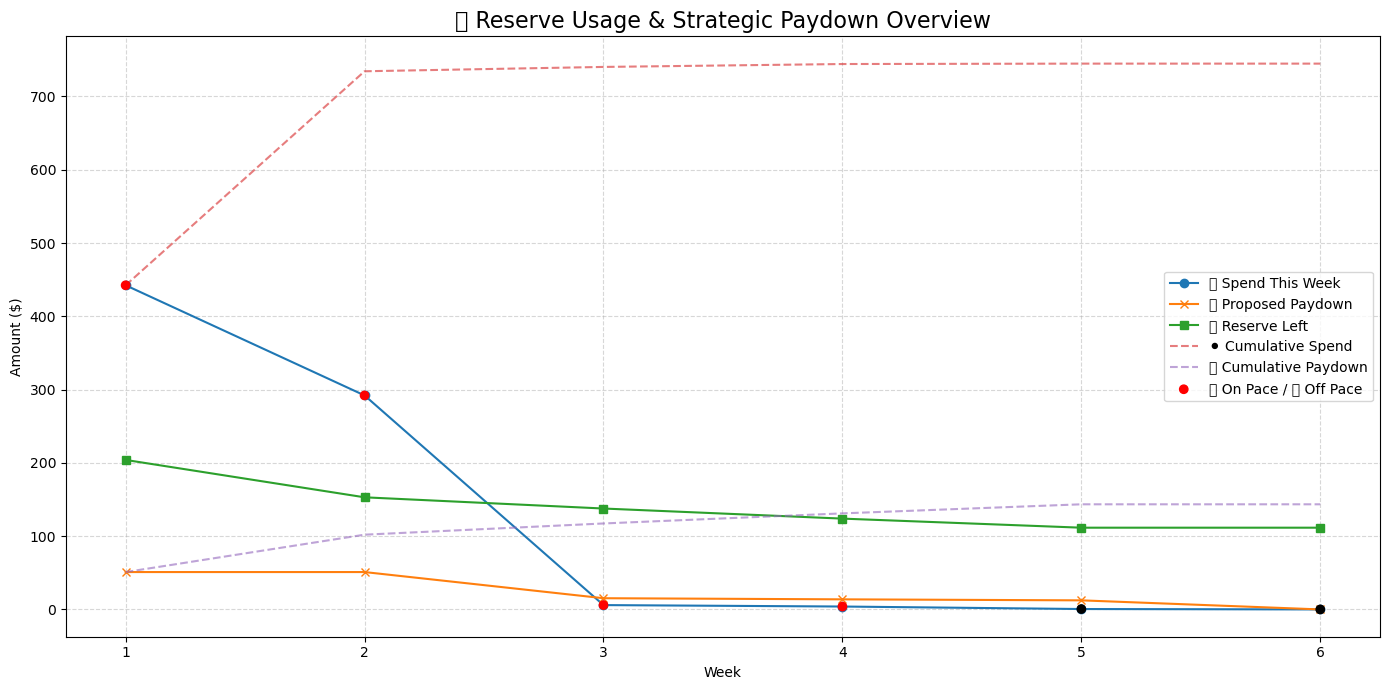

In [5]:


# 📊 Enhanced Visualization for Strategic Reserve Management
import matplotlib.pyplot as plt

# 🔄 Parse and prepare data
df_plot = forecast_df[forecast_df["Week"] != "TOTAL"].copy()
df_plot["Week"] = df_plot["Week"].astype(int)
df_plot["Spend This Week"] = df_plot["Spend This Week"].str.replace("$", "").astype(float)
df_plot["Proposed Paydown"] = df_plot["Proposed Paydown"].str.replace("$", "").astype(float)
df_plot["Reserve Left (Available)"] = df_plot["Reserve Left (Available)"].str.replace("$", "").astype(float)
df_plot["Cumulative Spend"] = df_plot["Cumulative Spend"].str.replace("$", "").astype(float)
df_plot["Cumulative Paydown"] = df_plot["Cumulative Paydown"].str.replace("$", "").astype(float)

# 🎯 Set color for points based on Credit Usage Status
colors = df_plot["Credit Usage Status"].map({
    "On Pace": "black",
    "Off Pace": "red"
})

# 📈 Plot the key trends
plt.figure(figsize=(14, 7))
plt.plot(df_plot["Week"], df_plot["Spend This Week"], label="🔵 Spend This Week", marker='o')
plt.plot(df_plot["Week"], df_plot["Proposed Paydown"], label="🟢 Proposed Paydown", marker='x')
plt.plot(df_plot["Week"], df_plot["Reserve Left (Available)"], label="🟡 Reserve Left", marker='s')
plt.plot(df_plot["Week"], df_plot["Cumulative Spend"], '--', label="⚫ Cumulative Spend", alpha=0.6)
plt.plot(df_plot["Week"], df_plot["Cumulative Paydown"], '--', label="🔴 Cumulative Paydown", alpha=0.6)

# 🟢🔴 Add usage status as dots
plt.scatter(df_plot["Week"], df_plot["Spend This Week"], color=colors, label="🟢 On Pace / 🔴 Off Pace", zorder=5)

# 🧭 Layout
plt.title("📊 Reserve Usage & Strategic Paydown Overview", fontsize=16)
plt.xlabel("Week")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
